In [1]:
import yfinance as yf
import numpy as np 
import pandas as pd
import matplotlib
import mplfinance as mpf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc
import scipy.stats as stats
from datetime import datetime, timedelta
import talib

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

/Users/samghala/anaconda3/lib/python3.7/site-packages/mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


In [3]:
""" Retrieve Data from yfinance
    :type ticker: string
    :type startDate: string '%Y-%m-%d'
    :type endDate: string '%Y-%m-%d'
    :rtype: pandas dataframe
    -----------------------
    yf.Ticker() -> takes ticker and returns tuple of ticker objects
    .history()  -> returns datafram corresponding to period specified
"""
def pullData(ticker, startDate, endDate):
    return yf.Ticker(ticker).history(start=startDate, end=endDate)

""" Generate a Candlestick Plot
    :type df: pandas dataframe
    :type mav: tuple
    :type ticker: string
"""

""" Return price at a given day
    :type date: str or pandas timestamp
    :type df: pandas dataframe
    :rtype: float
"""  
def getPrice(date, df):
    if df.loc[df.index==date].empty:
        print("ERR: Unable to getPrice(), No trading data for",date)
    return df.loc[df.index==date]['Open'][0]

""" Return all local minimums and maximums for a given timeframe
    :type df: pandas dataframe
    :type start: str or pandas timestamp
    :type end: str or pandas timestamp
    :rtype: dict{date:price}
"""  
def get_Peaks_and_Valleys(df, start, end):
    peaks = {}
    valleys = {}
    
    days = ( pd.to_datetime(end) -  pd.to_datetime(start)).days

    for i in range(0,days,3):    
        startDate = pd.to_datetime(start) + timedelta(i)

        while df.loc[df.index==startDate].empty:
            startDate = startDate + timedelta(1)

        initial_state = state(date=startDate, price=getPrice(startDate, df))

        climb = problem_hillclimb(initial=initial_state, df=df, objective_function=getPrice, stepsize=1)
        out = hill_climb(climb, n_iter=50)
        peaks[out.date] = out.price

        initial_state = state(date=startDate, price=getPrice(startDate, df))
        fall = problem_hillfall(initial=initial_state, df=df, objective_function=getPrice, stepsize=1)
        out = hill_fall(fall, n_iter=50)
        valleys[out.date] = out.price
        
    return peaks, valleys

"""~~~~~~~~~~~ FOR HILLCLIMBING ~~~~~~~~~~~"""

""" Define State of problem as a date and a time """ 
class state:
    def __init__(self, date, price):
        self.date = date
        self.price = price
    
class problem:
    """ Maintain everything that defines the problem
    :type initial_state: Class state
    :type current_state: Class state
    :type objective_function: defined function
    :type stepsize: int
    :type df: pandas dataframe
    """ 
    def __init__(self, initial, df, objective_function, stepsize):
        self.initial_state = initial
        self.current_state = initial
        self.objective_function = objective_function
        self.stepsize = stepsize
        self.df = df
    
    """ Return possible moves to take
    :rtype: array of dates
    """  
    def moves(self):
        all_moves = []
        
        newMoveForward = self.current_state.date + timedelta(self.stepsize)
        newMoveBackward = self.current_state.date - timedelta(self.stepsize)
        
        while df.loc[df.index==newMoveForward].empty:
            newMoveForward = newMoveForward + timedelta(self.stepsize)
        while df.loc[df.index==newMoveBackward].empty:
            newMoveBackward = newMoveBackward - timedelta(self.stepsize)
            
        all_moves.append(newMoveBackward)
        all_moves.append(newMoveForward)
        
        return all_moves
        
""" Performs hill climbing
    :type problem: Class problem
    :type n_iter: int
    :rtype: if peak found: Class state
            if no peak found: False
"""  
def hill_climb(problem, n_iter):
    # for t in some number of iterations:
    #     1. get a list of our available moves
    #     2. which move optimizes the objective function?
    #     3. do that move; update our status
    #     4. possible goal/convergence check
    
    for i in range(n_iter):
        nextMove, nextValue = problem.best_move()
        
        if nextValue <= problem.current_state.price: return problem.current_state
        
        problem.current_state.date, problem.current_state.price = nextMove, nextValue
        
    print("Reached n iterations.")
    return False

class problem_hillclimb(problem):
    """ Choose date that has higher price
    :rtype: datetime, int
    """  
    def best_move(self):
        all_moves = self.moves()
        
        obj_func = [self.objective_function(moves, self.df) for moves in all_moves]
        
        if obj_func[0] > obj_func[1]: return all_moves[0], obj_func[0]
        
        else: return all_moves[1], obj_func[1]
        
""" Performs hill falling
    :type problem: Class problem
    :type n_iter: int
    :rtype: if peak found: Class state
            if no peak found: False
"""          
def hill_fall(problem, n_iter):
    # for t in some number of iterations:
    #     1. get a list of our available moves
    #     2. which move optimizes the objective function?
    #     3. do that move; update our status
    #     4. possible goal/convergence check
    
    for i in range(n_iter):
        nextMove, nextValue = problem.best_move()
        
        if nextValue >= problem.current_state.price: return problem.current_state
    
        problem.current_state.date, problem.current_state.price = nextMove, nextValue
        
    print("Reached n iterations.")
    return False
   
class problem_hillfall(problem):
    """ Choose date that has lower price
    :rtype: datetime, int
    """  
    def best_move(self):
        all_moves = self.moves()
        
        obj_func = [self.objective_function(moves, self.df) for moves in all_moves]
        
        if obj_func[0] < obj_func[1]: return all_moves[0], obj_func[0]

        else: return all_moves[1], obj_func[1]


Date
2014-12-01    26.837774
2014-12-02    26.238039
2014-12-03    26.207544
2014-12-04    26.193426
2014-12-05    26.194894
                ...    
2016-01-25    23.318410
2016-01-26    23.214225
2016-01-27    23.081552
2016-01-28    22.930270
2016-01-29    22.771867
Name: Open, Length: 293, dtype: float64

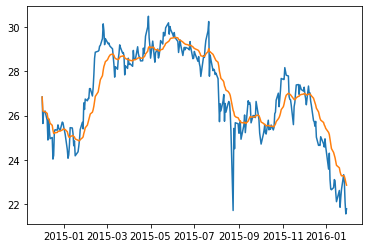

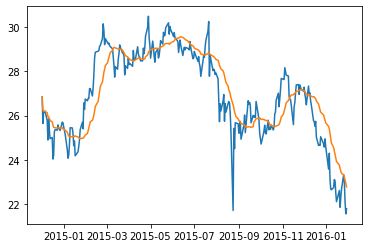

In [126]:
def Exponential_Moving_Average(df, category, alpha = 0.1):
    # Exponential Moving Average
    # Takes the running average of everyday with a weight so more recent days are weighted more
    ema = df[category].ewm(alpha=0.1,adjust=True).mean()
    plt.figure(1)
    plt.plot(df[category])
    plt.plot(ema)
    return ema

def Simple_Moving_Average(df, category, rolling_window = 7):
    # n day moving average
    # n = rolling_average
    sma = df[category].rolling(rolling_window,min_periods=1).mean()
    plt.figure(2)
    plt.plot(df[category])
    plt.plot(sma)
    return sma
    
    
ticker = 'AAPL'
startDate = '2014-12-01'
endDate = '2016-02-01'
df = pullData(ticker, startDate, endDate)

Exponential_Moving_Average(df, 'Open',0.1)
Simple_Moving_Average(df, 'Open',20)


In [4]:
ticker = 'AAPL'
startDate = '2014-12-01'
endDate = '2016-02-01'
df = pullData(ticker, startDate, endDate)
peaks, valleys = get_Peaks_and_Valleys(df, start='2015-01-01', end='2016-01-01')